Loading the California Housing dataset...
Dataset loaded successfully.
Original DataFrame head:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


Applying Standardization...
Applying Normalization (Min-Max Scaling)...
Applying Robust Scaler...
Applying MaxAbsScaler...
Applying Quantile Transformer...
Applying Power Transformer (Yeo-Johnson)...
Applying Log Transformer...

All transformations applied successfully.


Generating visualizations...


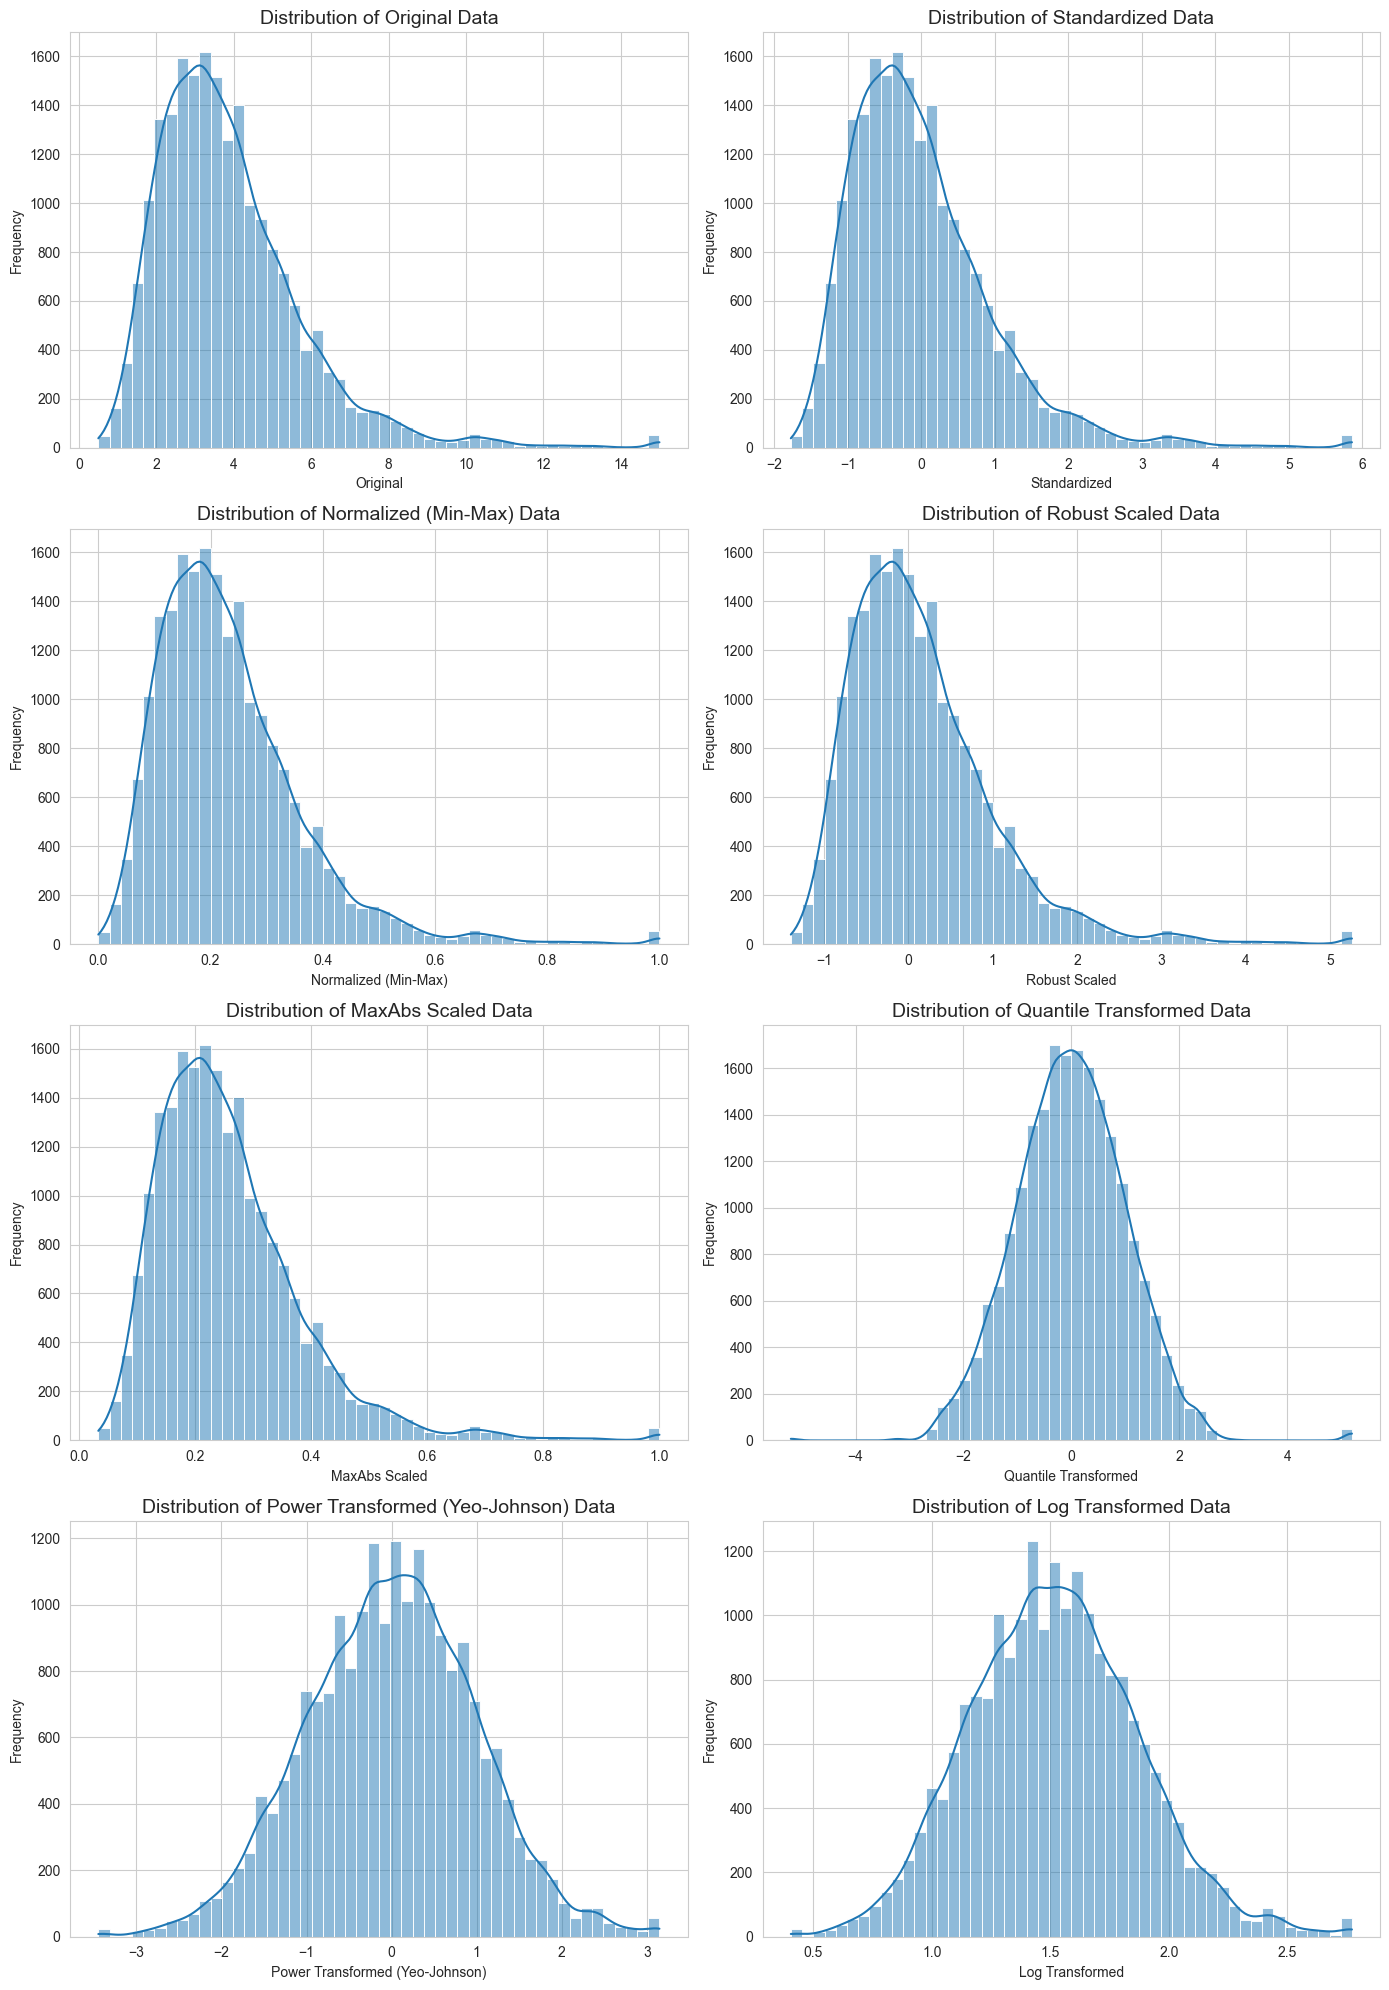

Visualizations generated.


Final DataFrame with transformed columns (head):
   MedInc  MedInc_Standardized  MedInc_Normalized  MedInc_Robust  \
0  8.3252             2.344766           0.539668       2.197582   
1  8.3014             2.332238           0.538027       2.186664   
2  7.2574             1.782699           0.466028       1.707732   
3  5.6431             0.932968           0.354699       0.967177   
4  3.8462            -0.012881           0.230776       0.142854   

   MedInc_MaxAbs  MedInc_Quantile  MedInc_Power  MedInc_Log  
0       0.555010         1.900150      1.903289    2.232720  
1       0.553423         1.895921      1.897081    2.230165  
2       0.483823         1.627169      1.604361    2.111110  
3       0.376204         1.080627      1.051321    1.893579  
4       0.256412         0.185869      0.205878    1.578195  


A Note on Unit Vector Scaling (Normalizer):

The 'Normalizer' from scikit-learn (which performs L1 or L2 unit vector scaling)
is not include

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    FunctionTransformer
)

# Set plot style for better aesthetics
sns.set_style("whitegrid")


# -------------------------------------------------------------------
# 1. Load Sample Dataset
# -------------------------------------------------------------------
# We'll use the California Housing dataset from scikit-learn.
# It contains various features about housing districts in California.
print("Loading the California Housing dataset...")
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
print("Dataset loaded successfully.")
print("Original DataFrame head:")
print(df.head())
print("\n" + "="*50 + "\n")




# -------------------------------------------------------------------
# 2. Select Feature to Transform
# -------------------------------------------------------------------
# We will work with the 'MedInc' (Median Income) feature to demonstrate
# the effects of different scaling and transformation techniques.
feature_to_transform = 'MedInc'
# Scikit-learn scalers expect a 2D array, so we reshape the data.
data_to_transform = df[feature_to_transform].values.reshape(-1, 1)



# -------------------------------------------------------------------
# 3. Apply Scaling and Transformation Techniques
# -------------------------------------------------------------------

# --- a) Standardization (StandardScaler) ---
# When to use: Use when your data follows a Gaussian (normal) distribution.
# It's less effective if the data has significant outliers.
# It centers the data around 0 with a standard deviation of 1.
print("Applying Standardization...")
standard_scaler = StandardScaler()
df['MedInc_Standardized'] = standard_scaler.fit_transform(data_to_transform)

# --- b) Normalization (MinMaxScaler) ---
# When to use: Use when you need to scale data into a fixed range, typically [0, 1].
# It's very sensitive to outliers, as they can compress the rest of the data into a small sub-range.
# Good for algorithms that do not assume any distribution of the data, like K-Nearest Neighbors.
print("Applying Normalization (Min-Max Scaling)...")
min_max_scaler = MinMaxScaler()
df['MedInc_Normalized'] = min_max_scaler.fit_transform(data_to_transform)

# --- c) Robust Scaler ---
# When to use: Use this scaler if your data contains significant outliers.
# It scales data based on the Interquartile Range (IQR), making it robust to outliers.
# It removes the median and scales the data according to the quantile range.
print("Applying Robust Scaler...")
robust_scaler = RobustScaler()
df['MedInc_Robust'] = robust_scaler.fit_transform(data_to_transform)

# --- d) MaxAbsScaler ---
# When to use: Use when dealing with sparse data (data with many zeros).
# It scales each feature by its maximum absolute value, preserving the sparsity of the dataset.
# The data is scaled to a [-1, 1] range.
print("Applying MaxAbsScaler...")
max_abs_scaler = MaxAbsScaler()
df['MedInc_MaxAbs'] = max_abs_scaler.fit_transform(data_to_transform)

# --- e) Quantile Transformer ---
# When to use: Use to transform features to follow a uniform or a normal distribution.
# This can be helpful for modeling algorithms that expect a specific distribution.
# It is non-linear and can help spread out the most frequent values. It's also robust to outliers.
# We'll transform to a normal distribution here.
print("Applying Quantile Transformer...")
quantile_transformer = QuantileTransformer(output_distribution='normal', n_quantiles=100)
df['MedInc_Quantile'] = quantile_transformer.fit_transform(data_to_transform)

# --- f) Power Transformer (Yeo-Johnson) ---
# When to use: Use to transform features to be more Gaussian-like. It is very effective
# at handling skewed data. It's useful for modeling algorithms that assume normality.
# The 'yeo-johnson' method can handle both positive and negative data.
print("Applying Power Transformer (Yeo-Johnson)...")
power_transformer = PowerTransformer(method='yeo-johnson')
df['MedInc_Power'] = power_transformer.fit_transform(data_to_transform)

# --- g) Log Transformer ---
# When to use: A simple and effective way to handle right-skewed data.
# It compresses the range of large values. We use np.log1p which is log(1+x)
# to handle any potential zero values gracefully.
print("Applying Log Transformer...")
# We use FunctionTransformer to apply any custom function, in this case np.log1p
log_transformer = FunctionTransformer(np.log1p)
df['MedInc_Log'] = log_transformer.fit_transform(data_to_transform)


print("\nAll transformations applied successfully.")
print("\n" + "="*50 + "\n")



# -------------------------------------------------------------------
# 4. Visualize the Results
# -------------------------------------------------------------------
# Create histograms to show the "before and after" effect of each transformation.
print("Generating visualizations...")

# Define the columns to plot
columns_to_plot = [
    ('Original', df[feature_to_transform]),
    ('Standardized', df['MedInc_Standardized']),
    ('Normalized (Min-Max)', df['MedInc_Normalized']),
    ('Robust Scaled', df['MedInc_Robust']),
    ('MaxAbs Scaled', df['MedInc_MaxAbs']),
    ('Quantile Transformed', df['MedInc_Quantile']),
    ('Power Transformed (Yeo-Johnson)', df['MedInc_Power']),
    ('Log Transformed', df['MedInc_Log'])
]

# Create a figure with subplots - adjusted to a 4x2 grid
fig, axes = plt.subplots(4, 2, figsize=(14, 20))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, (title, data) in enumerate(columns_to_plot):
    sns.histplot(data, kde=True, ax=axes[i], bins=50)
    axes[i].set_title(f'Distribution of {title} Data', fontsize=14)
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
print("Visualizations generated.")
print("\n" + "="*50 + "\n")



# -------------------------------------------------------------------
# 5. Display the Final DataFrame
# -------------------------------------------------------------------
# Print the head of the DataFrame to show the original data alongside
# the new columns containing the transformed data.
print("Final DataFrame with transformed columns (head):")
print(df[[
    feature_to_transform,
    'MedInc_Standardized',
    'MedInc_Normalized',
    'MedInc_Robust',
    'MedInc_MaxAbs',
    'MedInc_Quantile',
    'MedInc_Power',
    'MedInc_Log'
]].head())
print("\n" + "="*50 + "\n")


# -------------------------------------------------------------------
# 6. A Note on Unit Vector Scaling (Normalizer)
# -------------------------------------------------------------------
print("A Note on Unit Vector Scaling (Normalizer):")
print("""
The 'Normalizer' from scikit-learn (which performs L1 or L2 unit vector scaling)
is not included in this comparison for a specific reason: it operates on a
different axis.

All the scalers demonstrated above operate 'feature-wise' (per column). They
calculate statistics (like mean, min, max, IQR) for a feature and transform
that feature across all samples.

In contrast, the 'Normalizer' operates 'sample-wise' (per row). It scales each
sample (row) vector independently to have a unit length. This is primarily used
when the direction of the data vector is more important than its magnitude, such
as in text classification with TF-IDF vectors where cosine similarity is used.

Applying it to a single-column feature like we did here would not be a meaningful
demonstration, as each row would simply be scaled to 1 or -1.
""")
